## MNIST Conjunto de Datos

MNIST ("Modified National Institute of Standards and Technology")  es el conjunto de datos de “hola mundo ” de la visión por computadora. Desde su lanzamiento en 1999, este clásico conjunto de datos de imágenes manuscritas ha servido como base para los algoritmos de clasificación de referencia. A medida que surgen nuevas técnicas de aprendizaje automático, MNIST sigue siendo un recurso confiable para investigadores y estudiantes por igual.

En esta competencia, su objetivo es identificar correctamente los dígitos de un conjunto de datos de decenas de miles de imágenes escritas a mano. Lo invitamos a experimentar con diferentes algoritmos para aprender de primera mano qué funciona bien y cómo se comparan las técnicas.

Este ejemplo está usando dígitos manuscritos MNIST. El conjunto de datos contiene 60,000 ejemplos para entrenamiento y 10,000 ejemplos para pruebas. Los dígitos se han normalizado en tamaño y se han centrado en una imagen de tamaño fijo (28x28 píxeles) con valores de 0 a 1. Para simplificar, cada imagen se ha acoplado y convertido a una matriz numpy 1-D de 784 funciones (28 * 28 ).
![MNIST Dataset](https://www.researchgate.net/profile/Steven_Young11/publication/306056875/figure/fig1/AS:393921575309346@1470929630835/Example-images-from-the-MNIST-dataset.png)

In [0]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os
import warnings
warnings.filterwarnings("ignore")
# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "classification"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "imagesAM", CHAPTER_ID, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

## MNIST : "Hello world" de clasificación


In [0]:
def sort_by_target(mnist):
    reorder_train = np.array(sorted([(target, i) for i, target in enumerate(mnist.target[:60000])]))[:, 1]
    reorder_test = np.array(sorted([(target, i) for i, target in enumerate(mnist.target[60000:])]))[:, 1]
    mnist.data[:60000] = mnist.data[reorder_train]
    mnist.target[:60000] = mnist.target[reorder_train]
    mnist.data[60000:] = mnist.data[reorder_test + 60000]
    mnist.target[60000:] = mnist.target[reorder_test + 60000]

In [29]:
try:
    from sklearn.datasets import fetch_openml
    mnist = fetch_openml('mnist_784', version=1, cache=True)
    mnist.target = mnist.target.astype(np.int8) # fetch_openml() returns targets as strings
    sort_by_target(mnist) # fetch_openml() returns an unsorted dataset
except ImportError:
    from sklearn.datasets import fetch_mldata
    mnist = fetch_mldata('MNIST original')
mnist["data"], mnist["target"]

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([0, 0, 0, ..., 9, 9, 9], dtype=int8))

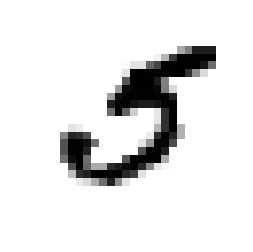

In [30]:
X, y = mnist["data"], mnist["target"]

some_digit = X[36000]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap = mpl.cm.binary,
           interpolation="nearest")
plt.axis("off")
plt.show()

In [0]:
def plot_digit(data): #función graficar dígito
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = mpl.cm.binary,
               interpolation="nearest")
    plt.axis("off")
    
# EXTRA
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = mpl.cm.binary, **options)
    plt.axis("off")

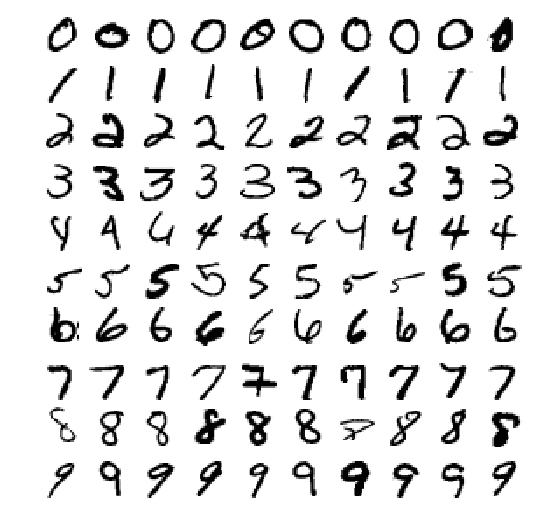

(100, 784)

In [32]:
plt.figure(figsize=(9,9))
example_images = np.r_[X[:12000:600], X[13000:30600:600], X[30600:60000:590]] #concatenar a la derecha
plot_digits(example_images, images_per_row=10)
plt.show()

np.shape(example_images)

In [0]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:] #particionar train y test

In [0]:
import numpy as np

shuffle_index = np.random.permutation(60000) #permutación datos
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

# Seleccionar un modelo y entrenar sobre los datos preparados,Sintonizar parametros

## Naive Bayes

In [0]:
# fitting the Naive bayes classifier to the training set
from sklearn.naive_bayes import GaussianNB
classifier_GaussianNB= GaussianNB()

In [36]:
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(classifier_GaussianNB , X_train, y_train, cv=5, n_jobs=-1,scoring="accuracy")


array([0.56, 0.56, 0.57, 0.56, 0.56])

In [0]:
from sklearn.model_selection import cross_val_predict
y_test_pred = cross_val_predict(classifier_GaussianNB , X_test, y_test, cv=5, n_jobs=-1)


# Matriz de confusión

In [0]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    fig, ax = plt.subplots(figsize=(10,50))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    #ax.figure.colorbar(im)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax



Normalized confusion matrix


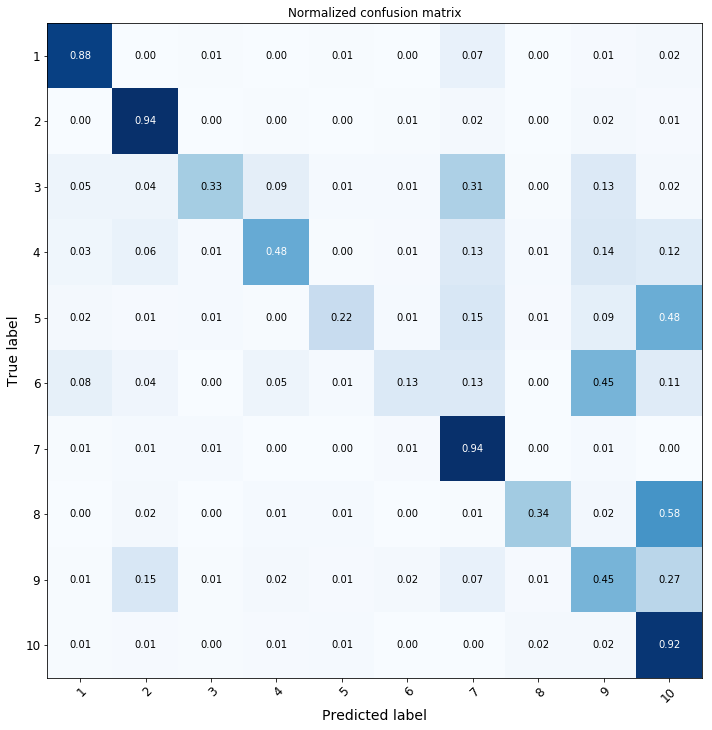

In [39]:
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

class_names = np.array(['1','2','3','4','5','6','7','8','9','10'])
np.set_printoptions(precision=2)


# Plot normalized confusion matrix
plot_confusion_matrix(y_test, y_test_pred, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [40]:
from sklearn.metrics import classification_report 
import pandas as pd
report_NaiveBayes= classification_report(y_test, y_test_pred,output_dict=True )  
report_NaiveBayes = pd.DataFrame(report_NaiveBayes).transpose()
print(report_NaiveBayes)

              f1-score  precision    recall     support
0             0.848455   0.816808  0.882653    980.0000
1             0.841070   0.759773  0.941850   1135.0000
2             0.480167   0.851852  0.334302   1032.0000
3             0.581105   0.726597  0.484158   1010.0000
4             0.342767   0.751724  0.221996    982.0000
5             0.215867   0.609375  0.131166    892.0000
6             0.662276   0.509859  0.944676    958.0000
7             0.489540   0.864532  0.341440   1028.0000
8             0.387154   0.342271  0.445585    974.0000
9             0.526316   0.368317  0.921705   1009.0000
accuracy      0.572300   0.572300  0.572300      0.5723
macro avg     0.537472   0.660111  0.564953  10000.0000
weighted avg  0.544355   0.663973  0.572300  10000.0000


## Stochastic Gradient Descent

In [41]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
alpha = np.array([0.005,0.001])
param_grid_SGDClassifier = [ {"alpha": alpha}]
classifier_SGDClassifier =SGDClassifier(alpha=0.005, max_iter=200, tol=1e-3)
grid_SGDClassifier =  GridSearchCV(classifier_SGDClassifier, param_grid_SGDClassifier, cv=5, scoring="accuracy",n_jobs=-1,verbose=1)
grid_SGDClassifier.fit(X_train, y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed: 13.8min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SGDClassifier(alpha=0.005, average=False,
                                     class_weight=None, early_stopping=False,
                                     epsilon=0.1, eta0=0.0, fit_intercept=True,
                                     l1_ratio=0.15, learning_rate='optimal',
                                     loss='hinge', max_iter=200,
                                     n_iter_no_change=5, n_jobs=None,
                                     penalty='l2', power_t=0.5,
                                     random_state=None, shuffle=True, tol=0.001,
                                     validation_fraction=0.1, verbose=0,
                                     warm_start=False),
             iid='warn', n_jobs=-1, param_grid=[{'alpha': array([0.01, 0.  ])}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=1)

In [42]:
cvres_ridgeReg = grid_SGDClassifier.cv_results_    
cvres_ridgeReg['mean_test_score']

array([0.87, 0.88])

In [43]:
grid_SGDClassifier.best_params_


{'alpha': 0.001}

In [44]:
grid_SGDClassifier.best_estimator_

SGDClassifier(alpha=0.001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=200, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [0]:
y_test_pred = grid_SGDClassifier.predict(X_test)

Normalized confusion matrix


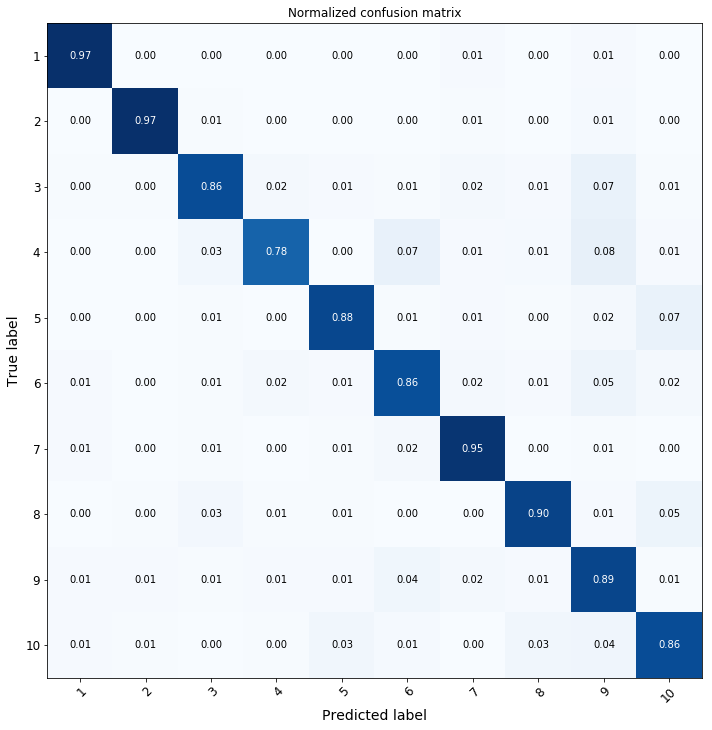

In [46]:
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

class_names = np.array(['1','2','3','4','5','6','7','8','9','10'])
np.set_printoptions(precision=2)


# Plot normalized confusion matrix
plot_confusion_matrix(y_test, y_test_pred, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [47]:
from sklearn.metrics import classification_report 
import pandas as pd
report_StochasticGradientDescent = classification_report(y_test, y_test_pred,output_dict=True )  
report_StochasticGradientDescent = pd.DataFrame(report_StochasticGradientDescent).transpose()
print(report_StochasticGradientDescent)

              f1-score  precision    recall     support
0             0.962102   0.952953  0.971429    980.0000
1             0.970044   0.970044  0.970044   1135.0000
2             0.883698   0.907143  0.861434   1032.0000
3             0.849730   0.935714  0.778218   1010.0000
4             0.899636   0.919235  0.880855    982.0000
5             0.841873   0.827736  0.856502    892.0000
6             0.929448   0.910822  0.948852    958.0000
7             0.909270   0.922000  0.896887   1028.0000
8             0.812207   0.748270  0.888090    974.0000
9             0.856161   0.848249  0.864222   1009.0000
accuracy      0.892500   0.892500  0.892500      0.8925
macro avg     0.891417   0.894217  0.891653  10000.0000
weighted avg  0.892855   0.896225  0.892500  10000.0000


# Linear  Discriminant Analysis

In [48]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
classifier_LinearDiscriminantAnalysis =LinearDiscriminantAnalysis(solver="svd", store_covariance=True)
cross_val_score(classifier_LinearDiscriminantAnalysis , X_train ,y_train, cv=5,n_jobs=-1, scoring="accuracy")

array([0.86, 0.87, 0.87, 0.86, 0.86])

In [0]:
y_test_pred = cross_val_predict(classifier_LinearDiscriminantAnalysis , X_test, y_test, cv=5,n_jobs=-1)

Normalized confusion matrix


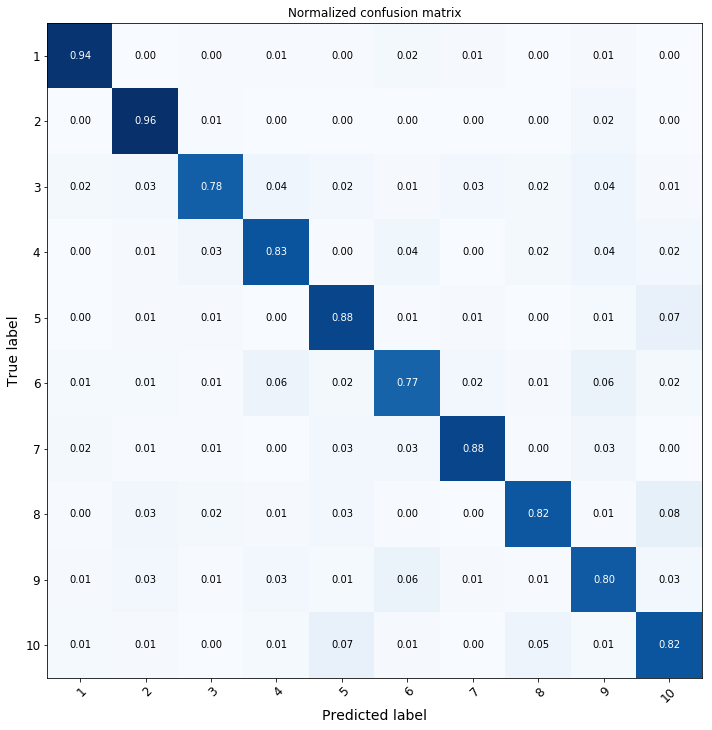

In [50]:
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

class_names = np.array(['1','2','3','4','5','6','7','8','9','10'])
np.set_printoptions(precision=2)


# Plot normalized confusion matrix
plot_confusion_matrix(y_test, y_test_pred, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [51]:
report_Linear= classification_report(y_test, y_test_pred,output_dict=True)  
report_Linear= pd.DataFrame(report_Linear).transpose()
print(report_Linear)

              f1-score  precision    recall     support
0             0.933805   0.924925  0.942857    980.0000
1             0.922166   0.886900  0.960352   1135.0000
2             0.837209   0.897010  0.784884   1032.0000
3             0.836000   0.844444  0.827723   1010.0000
4             0.848306   0.818957  0.879837    982.0000
5             0.786041   0.802570  0.770179    892.0000
6             0.893730   0.910173  0.877871    958.0000
7             0.850482   0.887831  0.816148   1028.0000
8             0.782609   0.762415  0.803901    974.0000
9             0.799616   0.776119  0.824579   1009.0000
accuracy      0.850600   0.850600  0.850600      0.8506
macro avg     0.848996   0.851134  0.848833  10000.0000
weighted avg  0.850389   0.852210  0.850600  10000.0000


# Quadratic Discriminant Analysis

In [52]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
classifier_QuadraticDiscriminantAnalysi=QuadraticDiscriminantAnalysis(store_covariance=True)
cross_val_score(classifier_QuadraticDiscriminantAnalysi , X_train, y_train, cv=5,n_jobs=-1 ,scoring="accuracy")

array([0.56, 0.54, 0.51, 0.55, 0.54])

In [0]:
y_test_pred = cross_val_predict(classifier_QuadraticDiscriminantAnalysi , X_test, y_test, cv=5,n_jobs=-1)

Normalized confusion matrix


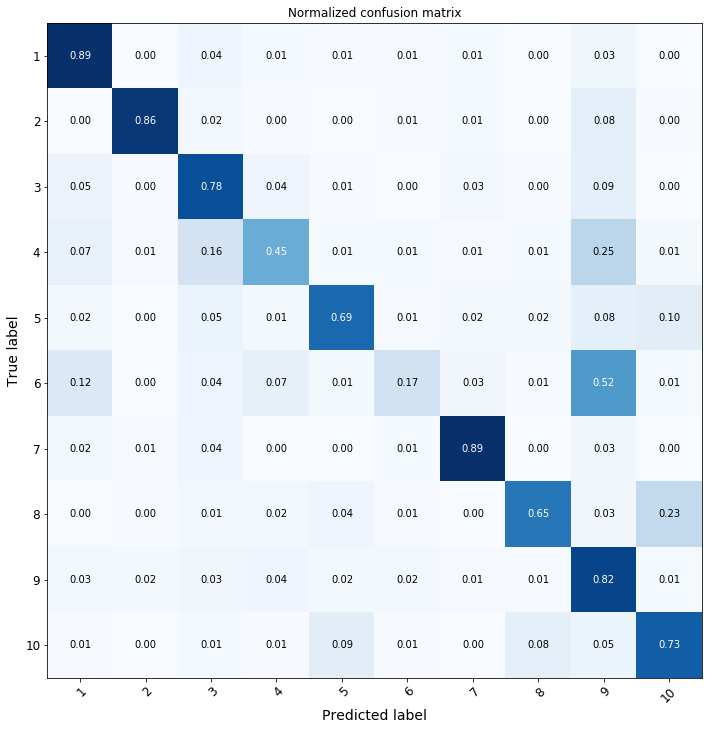

In [54]:
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

class_names = np.array(['1','2','3','4','5','6','7','8','9','10'])
np.set_printoptions(precision=2)


# Plot normalized confusion matrix
plot_confusion_matrix(y_test, y_test_pred, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [55]:
report_QuadraticDiscriminant= classification_report(y_test, y_test_pred,output_dict=True)  
report_QuadraticDiscriminant= pd.DataFrame(report_QuadraticDiscriminant).transpose()
print(report_QuadraticDiscriminant)

              f1-score  precision    recall     support
0             0.807959   0.739204  0.890816    980.0000
1             0.902868   0.950341  0.859912   1135.0000
2             0.718861   0.664474  0.782946   1032.0000
3             0.546547   0.694656  0.450495   1010.0000
4             0.736501   0.783908  0.694501    982.0000
5             0.273050   0.652542  0.172646    892.0000
6             0.887500   0.885655  0.889353    958.0000
7             0.728070   0.834171  0.645914   1028.0000
8             0.548952   0.412494  0.820329    974.0000
9             0.694223   0.659821  0.732408   1009.0000
accuracy      0.700200   0.700200  0.700200      0.7002
macro avg     0.684453   0.727727  0.693932  10000.0000
weighted avg  0.691107   0.731578  0.700200  10000.0000


# Nearest Neighbors

In [9]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

n_neighbors = np.array([1,3,6])
param_grid_KNeighbors = [{"n_neighbors": n_neighbors}]
grid_KNeighbors =  GridSearchCV( KNeighborsClassifier(n_neighbors=3,n_jobs=-1), param_grid_KNeighbors, cv=3,n_jobs=-1,scoring="accuracy",verbose=1)
grid_KNeighbors.fit(X_train, y_train)

Fitting 3 folds for each of 3 candidates, totalling 9 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed: 147.5min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=-1,
                                            n_neighbors=3, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=-1,
             param_grid=[{'n_neighbors': array([1, 3, 6])}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=1)

In [12]:
cvres_ridgeReg = grid_KNeighbors.cv_results_    
cvres_ridgeReg['mean_test_score']

array([0.97031667, 0.97      , 0.96758333])

In [13]:
grid_KNeighbors.best_params_

{'n_neighbors': 1}

In [14]:
grid_KNeighbors.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=1, p=2,
                     weights='uniform')

In [0]:
y_train_pred_KNeighbors = grid_KNeighbors.predict(X_test)

Normalized confusion matrix


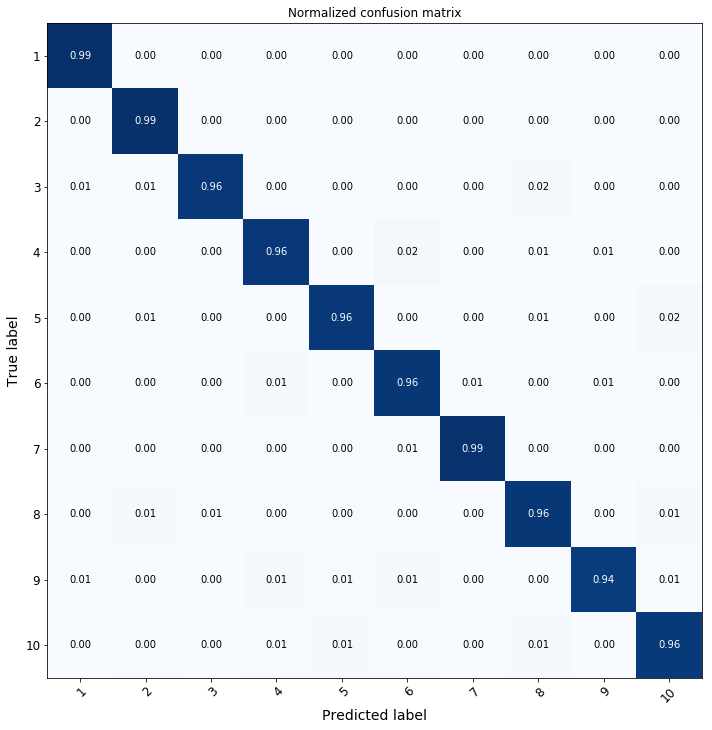

In [20]:
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

class_names = np.array(['1','2','3','4','5','6','7','8','9','10'])
np.set_printoptions(precision=2)


# Plot normalized confusion matrix
plot_confusion_matrix(y_test, y_train_pred_KNeighbors, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [26]:
from sklearn.metrics import classification_report
import pandas as pd
report_NearestNeighbors= classification_report(y_test,y_train_pred_KNeighbors,output_dict=True)  
report_NearestNeighbors= pd.DataFrame(report_NearestNeighbors).transpose()
print(report_NearestNeighbors)

              f1-score  precision    recall     support
0             0.986315   0.979859  0.992857    980.0000
1             0.980886   0.967438  0.994714   1135.0000
2             0.972549   0.984127  0.961240   1032.0000
3             0.960872   0.961348  0.960396   1010.0000
4             0.966718   0.972194  0.961303    982.0000
5             0.957684   0.951327  0.964126    892.0000
6             0.983333   0.981289  0.985386    958.0000
7             0.960775   0.956606  0.964981   1028.0000
8             0.962343   0.980810  0.944559    974.0000
9             0.957426   0.956479  0.958375   1009.0000
accuracy      0.969100   0.969100  0.969100      0.9691
macro avg     0.968890   0.969148  0.968794  10000.0000
weighted avg  0.969069   0.969202  0.969100  10000.0000


In [0]:
backup = pd.HDFStore('backup.h5')
backup['report_QuadraticDiscriminant'] = report_QuadraticDiscriminant
backup['report_Linear'] = report_Linear
backup['report_StochasticGradientDescent'] = report_StochasticGradientDescent
backup['report_NaiveBayes'] = report_NaiveBayes
backup['report_NearestNeighbors'] = report_NearestNeighbors
backup.close()


In [11]:
from sklearn.externals import joblib
filename = 'finalized_model.sav'
joblib.dump(grid_KNeighbors, filename)

/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


['finalized_model.sav']

### Seleccionar un modelo Sintonizado con los mejores parámetros

In [0]:
#Naive Bayes
f1_score_NaiveBayes = np.array(report_NaiveBayes["f1-score"])
precision_NaiveBayes = np.array(report_NaiveBayes["precision"])
recall_NaiveBayes = np.array(report_NaiveBayes["recall"])

#LinearDiscriminant Analysis
f1_score_Linear = np.array(report_Linear["f1-score"])
precision_Linear = np.array(report_Linear["precision"])
recall_Linear = np.array(report_Linear["recall"])


#Quadratic Discriminant Analysis
f1_score_QuadraticDiscriminant = np.array(report_QuadraticDiscriminant["f1-score"])
precision_QuadraticDiscriminant = np.array(report_QuadraticDiscriminant["precision"])
recall_QuadraticDiscriminant = np.array(report_QuadraticDiscriminant["recall"])


## Nearest Neighbors
f1_score_NearestNeighbors = np.array(report_NearestNeighbors["f1-score"])
precision_NearestNeighbors = np.array(report_NearestNeighbors["precision"])
recall_NearestNeighbors = np.array(report_NearestNeighbors["recall"])



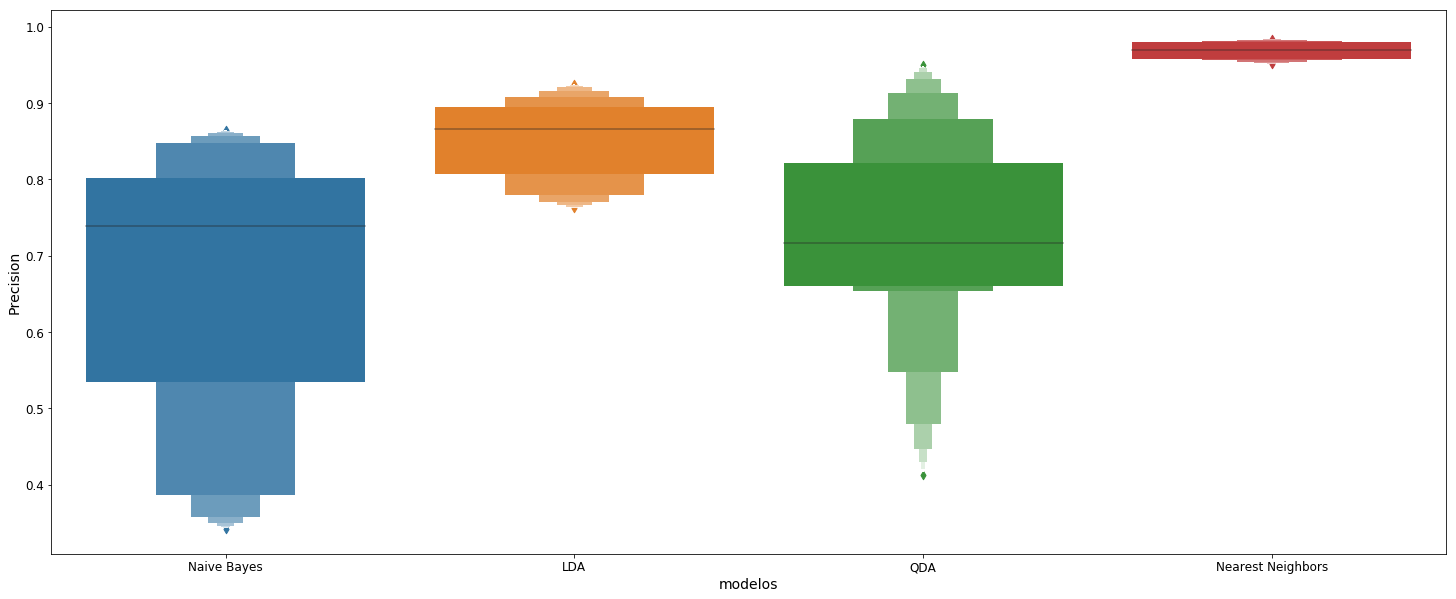

In [58]:
import seaborn as sns
# Función que convierte los datos en el factor de euros
def modelos_name(name):
    # Convert M in value column to millions
    if name == 1.0:
        return 'Naive Bayes'
    if name == 2.0:
        return 'LDA'
    if name == 3.0:
        return 'QDA'
    if name == 4.0:
        return 'Nearest Neighbors'

#modelos
modelos=np.array([[np.ones(len(precision_NaiveBayes[0:10]))], [np.ones(len(precision_Linear[0:10]))*2], 
                  [np.ones(len(precision_QuadraticDiscriminant[0:10]))*3],[np.ones(len(precision_NearestNeighbors[0:10]))*4]                 
                 ])

modelos=np.reshape(modelos,40)
parametros_modelos=np.array([[precision_NaiveBayes[0:10]], [precision_Linear[0:10]], 
                             [precision_QuadraticDiscriminant[0:10]], [precision_NearestNeighbors[0:10]]
                            ])
parametros_modelos=np.reshape(parametros_modelos, 40)

rultados_de_test_train= {'modelos': pd.Series(modelos),                         
                         'Precision': pd.Series(parametros_modelos)}
                                                         

rultados_de_test_train_table = pd.DataFrame(rultados_de_test_train)
rultados_de_test_train_table['modelos']= rultados_de_test_train_table['modelos'].apply(lambda x:  modelos_name(x) )

plt.figure(figsize=(25,10))
sns.boxenplot(rultados_de_test_train_table['modelos'],rultados_de_test_train_table['Precision'])

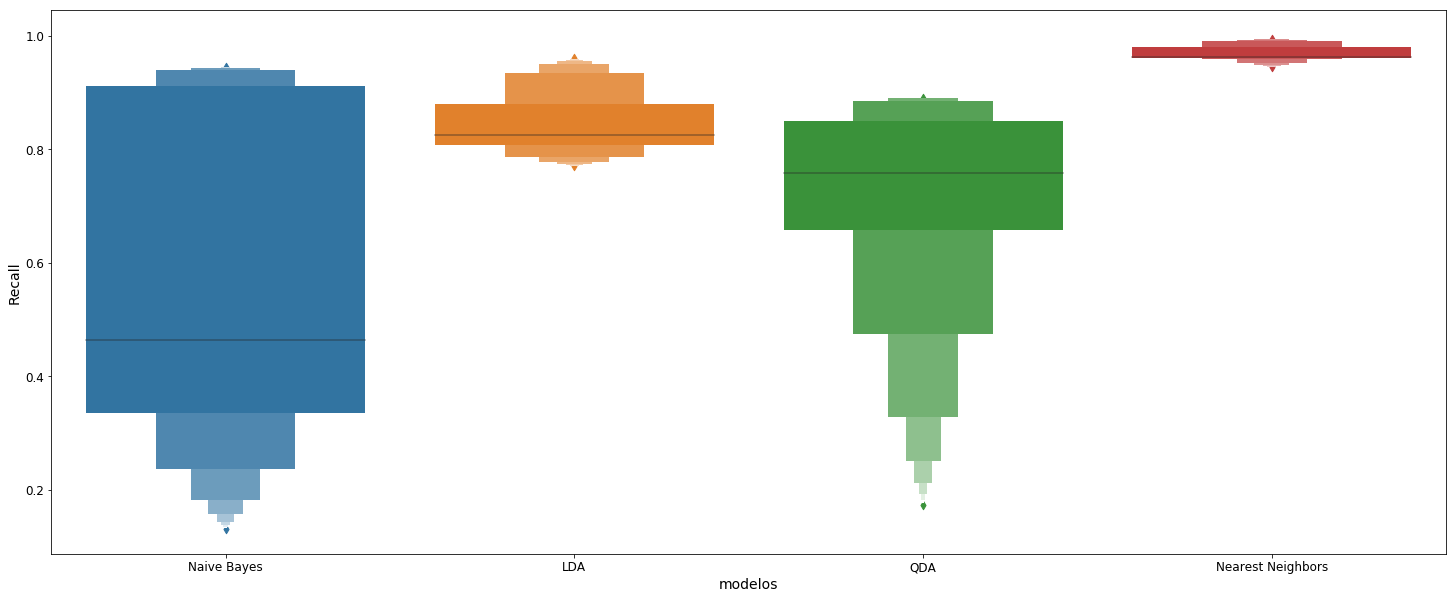

In [59]:
import seaborn as sns
# Función que convierte los datos en el factor de euros
def modelos_name(name):
    # Convert M in value column to millions
    if name == 1.0:
        return 'Naive Bayes'
    if name == 2.0:
        return 'LDA'
    if name == 3.0:
        return 'QDA'
    if name == 4.0:
        return 'Nearest Neighbors'

#modelos
modelos=np.array([[np.ones(len(recall_NaiveBayes[0:10]))], [np.ones(len(recall_Linear[0:10]))*2], 
                  [np.ones(len(recall_QuadraticDiscriminant[0:10]))*3],[np.ones(len(recall_NearestNeighbors[0:10]))*4]                 
                 ])

modelos=np.reshape(modelos,40)
parametros_modelos=np.array([[recall_NaiveBayes[0:10]], [recall_Linear[0:10]], 
                             [recall_QuadraticDiscriminant[0:10]], [recall_NearestNeighbors[0:10]]
                            ])
parametros_modelos=np.reshape(parametros_modelos, 40)

rultados_de_test_train= {'modelos': pd.Series(modelos),                         
                         'Recall': pd.Series(parametros_modelos)}
                                                         

rultados_de_test_train_table = pd.DataFrame(rultados_de_test_train)
rultados_de_test_train_table['modelos']= rultados_de_test_train_table['modelos'].apply(lambda x:  modelos_name(x) )

plt.figure(figsize=(25,10))
sns.boxenplot(rultados_de_test_train_table['modelos'],rultados_de_test_train_table['Recall'])

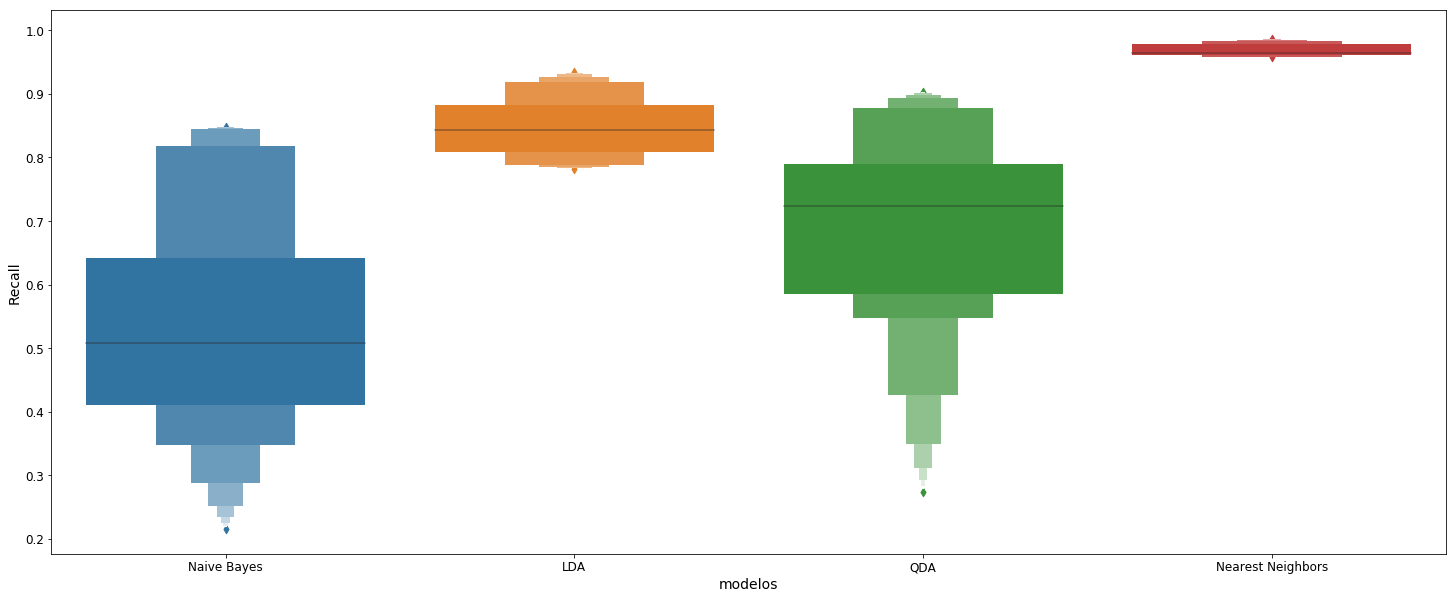

In [60]:
import seaborn as sns
# Función que convierte los datos en el factor de euros
def modelos_name(name):
    # Convert M in value column to millions
    if name == 1.0:
        return 'Naive Bayes'
    if name == 2.0:
        return 'LDA'
    if name == 3.0:
        return 'QDA'
    if name == 4.0:
        return 'Nearest Neighbors'

#modelos
modelos=np.array([[np.ones(len(f1_score_NaiveBayes[0:10]))], [np.ones(len(f1_score_Linear[0:10]))*2], 
                  [np.ones(len(f1_score_QuadraticDiscriminant[0:10]))*3],[np.ones(len(f1_score_NearestNeighbors[0:10]))*4]                 
                 ])

modelos=np.reshape(modelos,40)
parametros_modelos=np.array([[f1_score_NaiveBayes[0:10]], [f1_score_Linear[0:10]], 
                             [f1_score_QuadraticDiscriminant[0:10]], [f1_score_NearestNeighbors[0:10]]
                            ])
parametros_modelos=np.reshape(parametros_modelos, 40)

rultados_de_test_train= {'modelos': pd.Series(modelos),                         
                         'Recall': pd.Series(parametros_modelos)}
                                                         

rultados_de_test_train_table = pd.DataFrame(rultados_de_test_train)
rultados_de_test_train_table['modelos']= rultados_de_test_train_table['modelos'].apply(lambda x:  modelos_name(x) )

plt.figure(figsize=(25,10))
sns.boxenplot(rultados_de_test_train_table['modelos'],rultados_de_test_train_table['Recall'])